<a href="https://colab.research.google.com/github/nandanajayachandran/NANDANA_J_ICT_ASSIGNMENTS_CASE_STUDIES/blob/main/Nandana_J_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT:-2 - ENSEMBLE LEARNING**




In [103]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [104]:
# Loading the dataset
df = pd.read_csv('/content/train_loan (2).csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [106]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [107]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [108]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **PREPROCESSING**

In [109]:
#Checking for null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History

**IMPUTATION**

In [110]:
from sklearn.impute import SimpleImputer

# Columns having missing values
colm_miss = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

In [111]:
#Handling missing values in numerical columns
num_colm = ['LoanAmount', 'Loan_Amount_Term']
num_imputer = SimpleImputer(strategy='median')
df[num_colm] = num_imputer.fit_transform(df[num_colm])

In [112]:
# Impute missing values in categorical columns with mode
cat_colm = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_colm] = cat_imputer.fit_transform(df[cat_colm])

In [113]:
#cross checking
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now all the missing values are handled.

**HANDLING OUTLIERS**

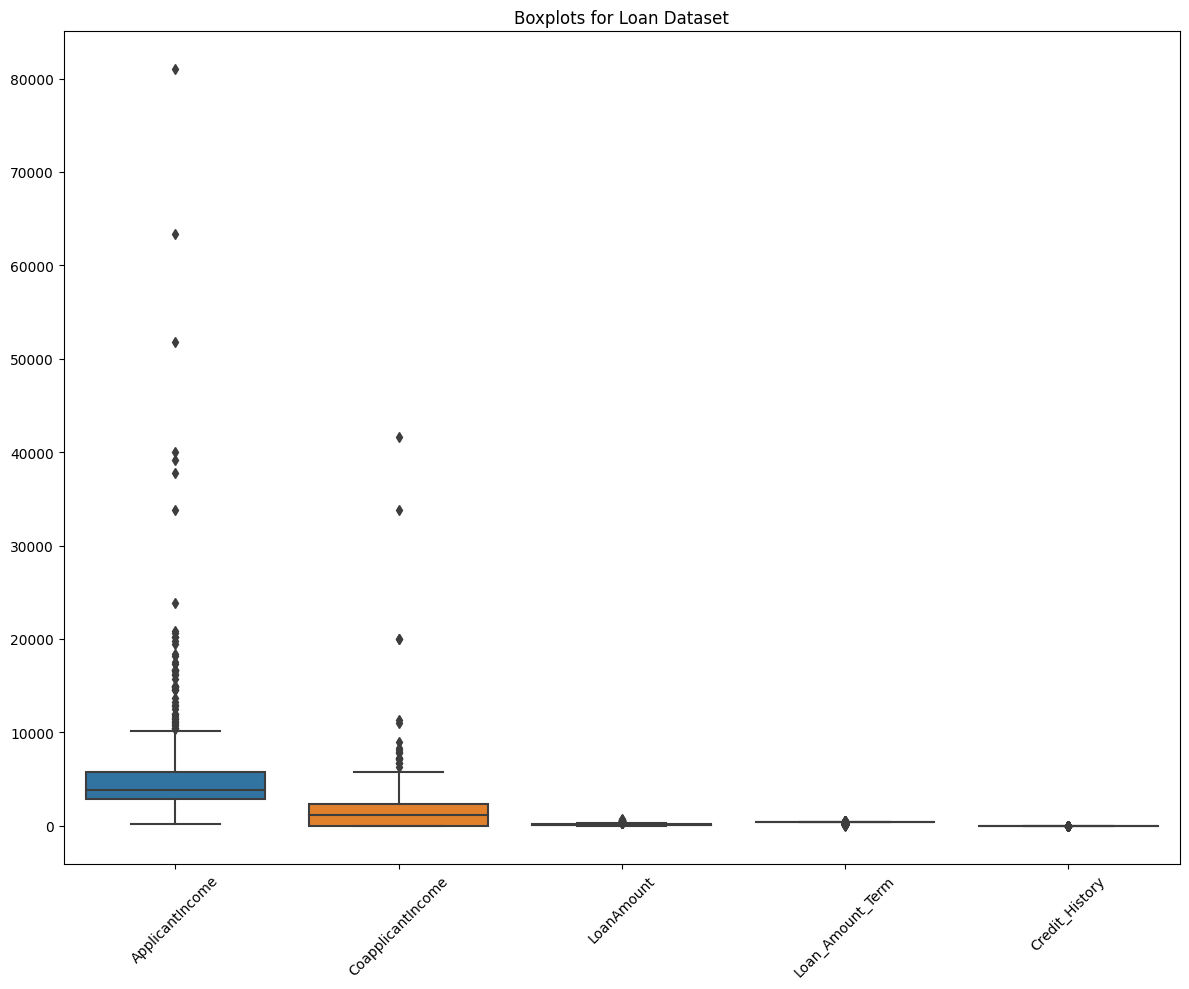

In [114]:
#Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
plt.title("Boxplots for Loan Dataset")
# Creating box plot
sns.boxplot(df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

We can see outliers in these columns: ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History.

In [115]:
from scipy.stats import zscore
columns_outliers = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
#Convert columns to numeric type
df[columns_outliers] = df[columns_outliers].apply(pd.to_numeric, errors='coerce')
#Calculate Z-scores
z_scores = np.abs(zscore(df[columns_outliers]))
df = df[(z_scores < 3).all(axis=1)]

**ENCODING - LABEL ENCODER**

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Loan_ID', 'Dependents', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col.astype(str)))

<ipython-input-117-cc63c507c266>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col.astype(str)))


**Defining X and y**

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [120]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**ENSEMBLE LEARNING TECHINIQUE**

In [121]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

**Random Forest Classifier**

In [122]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy}")

Random Forest Accuracy: 0.8189655172413793


**Gradient Boosting Classifier**

In [123]:
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f"Gradient Boosting Accuracy: {gb_accuracy}")

Gradient Boosting Accuracy: 0.7931034482758621


**AdaBoost Classifier**

In [124]:
ab_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ab_model.fit(X_train, y_train)
ab_predictions = ab_model.predict(X_test)
ab_accuracy = accuracy_score(y_test, ab_predictions)
print(f"AdaBoost Accuracy: {ab_accuracy}")

AdaBoost Accuracy: 0.7844827586206896


**Bagged Decision Trees Classifier**

In [125]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)
bagging_predictions = bagging_model.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_predictions)
print(f"Bagged Decision Trees Accuracy: {bagging_accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagged Decision Trees Accuracy: 0.8189655172413793
